# Proyek Analisis Data: E-Commerce Public Dataset
- Kelompok : IF8 -zlib
- Anggota : </br>
10122286 - Didan Rahmana Putra</br>
10122290 - Muhamad Haerul Anwar</br>
10122282 - Dwi Andriani Azi</br>
10122299 - Farras Abiyyu Dakhilullah</br>
10122479 - Ryan Akbar Ramadhan</br>
10122480 - Paska Damarkus Sinaga</br>

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 - 10122286 - Didan Rahmana Putra
  Berapa jumlah pelanggan dari kota Rio de Janeiro yang melakukan pembelian produk dengan kategori Computer Accessories pada tahun 2018 Dan dari
  pembelian tersebut, berapa banyak order yang telah dikirim (delivered), dalam proses pengiriman (shipped), dan berapa yang dibatalkan
  (cancelled) pada tahun 2018?

- Pertanyaan 2 - 10122290 - Muhamad Haerul Anwar
  Berapa banyak customer yang berasal dari kota Sao Paulo dan berapa banyak yang memberikan rating dibawah 3, lalu apa yang harus di evaluasi?
  
- Pertanyaan 3 - 10122282 - Dwi Andriani Azi
  Berdasarkan analisis data pada dataset order_items_dataset.csv, apakah terdapat adanya potensi peningkatan atau perbaikan penjualan?
  
- Pertanyaan 4 - 10122299 - Farras Abiyyu Dakhilullah
  Kostumer paling banyak di kota mana dan paling sedikit di kota mana? dan tampilkan juga nilainya!

- Pertanyaan 5 - 10122479 - Ryan Akbar Ramadhan
  Berapa banyak kustomer dari state Rio de Janeiro (RJ)

- Pertanyaan 6 - 10122480 - Paska Damarkus Sinaga
  Menampilkan data dari dataset produk name lenght lebih besar dari 63.0

## Menyaipkan semua library yang dibuthkan

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

## Data Wrangling

### Gathering Data

In [11]:
#Pertanyaan 1 - Didan Rahmana
customer_data = pd.read_csv('customers_dataset.csv')
order_data = pd.read_csv('orders_dataset.csv')
product_data = pd.read_csv('products_dataset.csv')
order_items_data = pd.read_csv('order_items_dataset.csv')

#Pertanyaan 2 - Anwar
data_customer = "./customers_dataset.csv"
df_data_customer = pd.read_csv(data_customer)

data_rating = "./order_reviews_dataset.csv"
df_data_rating = pd.read_csv(data_rating)
df_data_rating

#Pertanyaan 3 - Dwi
df = pd.read_csv('order_items_dataset.csv')

#Pertanyaan 4 - Farras
customer_df = pd.read_csv('customers_dataset.csv')
seller_df = pd.read_csv('sellers_dataset.csv')

#Pertanyaan 5 - Ryan
geolocation_data = pd.read_csv('geolocation_dataset.csv')
customer_data = pd.read_csv('customers_dataset.csv')
product_data = pd.read_csv('products_dataset.csv')
order_data = pd.read_csv('orders_dataset.csv')
order_items_data = pd.read_csv('order_items_dataset.csv')

#Pertanyaan 6 - Paska
df = pd.read_csv("products_dataset.csv")

### Assessing Data

Pertanyaan 1 - Didan Rahmana

In [12]:
# Merge dataset order_data dengan dataset order_items_data berdasarkan order_id
order_merged_with_items = pd.merge(order_data, order_items_data, on='order_id')

# Merge hasil penggabungan dengan dataset produk berdasarkan 'product_id'
merged_data = pd.merge(pd.merge(order_merged_with_items, product_data, on='product_id'), customer_data, on='customer_id')

# Menampilkan informasi umum dataset
merged_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   customer_id                    112650 non-null  object 
 2   order_status                   112650 non-null  object 
 3   order_purchase_timestamp       112650 non-null  object 
 4   order_approved_at              112635 non-null  object 
 5   order_delivered_carrier_date   111456 non-null  object 
 6   order_delivered_customer_date  110196 non-null  object 
 7   order_estimated_delivery_date  112650 non-null  object 
 8   order_item_id                  112650 non-null  int64  
 9   product_id                     112650 non-null  object 
 10  seller_id                      112650 non-null  object 
 11  shipping_limit_date            112650 non-null  object 
 12  price                         

Pertanyaan 2 - Anwar

In [13]:
count_saopaulo = [0]
count_rating = [0]

for data in df_data_customer['customer_city'] :
    if data == 'sao paulo' :
        count_saopaulo[0] += 1 
        
for data in df_data_rating['review_score']:
    if(data) <= 3 :
        count_rating[0] += 1

x_coords1 = np.arange(len(count_saopaulo)) 
x_coords2 = np.arange(len(count_rating)) 


Pertanyaan 3 - Dwi

In [14]:
df = pd.read_csv('order_items_dataset.csv')
total_order_value = df.groupby('order_id')['price'].sum()
avg_order_value_per_seller = df.groupby('seller_id')['price'].mean()
total_freight_value = df.groupby('order_id')['freight_value'].sum()
avg_freight_value_per_seller = df.groupby('seller_id')['freight_value'].mean()

df['profit_margin'] = df['price'] - df['freight_value']
total_profit_margin = df.groupby('order_id')['profit_margin'].sum()


Pertanyaan 4 - Farras

In [15]:
customer_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [16]:
seller_df
# mengecek Missing values
customer_df.isna().sum()
# Mengecek duplikasi data
customer_df.duplicated().sum()
# Mengecek Tipe Data
customer_df.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

In [17]:
# mengecek Missing values
seller_df.isna().sum()
# Mengecek duplikasi data
seller_df.duplicated().sum()
# Mengecek Tipe Data
seller_df.dtypes

seller_id                 object
seller_zip_code_prefix     int64
seller_city               object
seller_state              object
dtype: object

Pertanyaan 5 - Ryan

In [18]:
#Mengambil Atribut Customer_State dari tabel Customer
cust_loc = customer_data['customer_state'].str.slice(0,2)



Pertanyaan 6 - Paska

In [20]:
moveis_decoracao = df[df['product_category_name'] == 'moveis_decoracao']
jumlah = moveis_decoracao[moveis_decoracao['product_name_lenght'] >63.0]

KeyError: 'product_category_name'

### Cleaning Data

Pertanyaan 1 - Didan

In [21]:
# Konversi kolom 'order_purchase_timestamp' jadi tipe data datetime
merged_data['order_purchase_timestamp'] = pd.to_datetime(merged_data['order_purchase_timestamp'])
# Filter data untuk produk dengan kategori Computet Accessories dan kota Rio de Janeiro pada tahun 2018
filtered_columns = ['order_id','product_category_name', 'order_purchase_timestamp', 'customer_city','order_status']
filtered_data = merged_data.loc[(merged_data['product_category_name'] == 'informatica_acessorios') & 
                                (merged_data['customer_city'] == 'rio de janeiro') &
                                (merged_data['order_purchase_timestamp'].dt.year == 2018), filtered_columns]

# menampilkan hasil data yang sudah difilter
display(filtered_data.head(10))


,order_id,product_category_name,order_purchase_timestamp,customer_city,order_status
2010,38c4ae942b818085578157aabd4abf9e,informatica_acessorios,2018-03-18 20:59:28,rio de janeiro,delivered
2012,df82ea7ca7f0f799161e0fd92c3ab96a,informatica_acessorios,2018-05-14 11:28:58,rio de janeiro,delivered
2013,df82ea7ca7f0f799161e0fd92c3ab96a,informatica_acessorios,2018-05-14 11:28:58,rio de janeiro,delivered
2015,45b0a671da62d1c868294b22b4837dca,informatica_acessorios,2018-01-22 15:35:47,rio de janeiro,delivered
2043,89f3db58a5290d65a2f5a8ac62089da4,informatica_acessorios,2018-04-28 17:01:03,rio de janeiro,delivered
2047,4f3d999a0ae0716dc5695cf3fa630f34,informatica_acessorios,2018-01-31 18:54:19,rio de janeiro,delivered
2055,fceed72ef6fde5b43c8bcefbdb223edc,informatica_acessorios,2018-03-29 12:27:47,rio de janeiro,shipped
2073,095a4047965f98a409258e1db6c99e79,informatica_acessorios,2018-08-07 23:10:59,rio de janeiro,delivered
2074,828b618008ee0b34f4648124668023f0,informatica_acessorios,2018-02-01 12:58:09,rio de janeiro,delivered
2082,00ce92d57f4f9a112bdb8a2a283e5f97,informatica_acessorios,2018-01-30 16:20:19,rio de janeiro,delivered


Pertanyaan 5 - Ryan

In [22]:
#Menghitung Customer_State
count_loc = customer_data.pivot_table(index = cust_loc, values = ['customer_state'],aggfunc = 'count')  

#Menampilkan Customer_State yang ber-value 'SP'
print('>>> Banyaknya Kustomer yang berasal dari state RJ : <<<')
display(count_loc.loc[['RJ']].rename(index = {'RJ' :  'Rio de Janeiro (RJ)'}))

>>> Banyaknya Kustomer yang berasal dari state RJ : <<<


,customer_state
customer_state,
Rio de Janeiro (RJ),12852


## Exploratory Data Analysis (EDA)

### Explore ...

Pertanyaan 1 - Didan Rahmana

In [23]:
# Filter data untuk kategori computer acessories dan kota Rio de Janeiro pada tahun 2018
filtered_data = merged_data[(merged_data['product_category_name'] == 'informatica_acessorios') & 
                             (merged_data['customer_city'] == 'rio de janeiro') & 
                             (merged_data['order_purchase_timestamp'].dt.year == 2018)]

# Hitung jumlah pelanggan yang membeli produk dgn kategori computer accessories
jumlah_pelanggan_CA = filtered_data['customer_id'].nunique()

# Hitung banyaknya order yang delivered,shipped,cancelled
order_delivered = filtered_data[filtered_data['order_status'] == 'delivered']
order_cancelled = filtered_data[filtered_data['order_status'] == 'canceled']
order_shipped = filtered_data[filtered_data['order_status'] == 'shipped']

# Filter data untuk kota Rio de Janeiro
RJ_data = merged_data[merged_data['customer_city'] == 'rio de janeiro']

# Hitung jumlah total pelanggan dari kota Rio de Janeiro yang belanja seluruh kategori
total_pelanggan_RJ = RJ_data['customer_id'].nunique()

# Hitung proporsi jumlah pelanggan terhadao pembelian produk
proporsi = jumlah_pelanggan_CA / total_pelanggan_RJ * 100

print(f"Jumlah total pelanggan dari Kota Rio de Janeiro: {total_pelanggan_RJ}")
print(f"Jumlah Pelanggan dari Rio de Janeiro yang Membeli Produk Komputer Aksesoris pada Tahun 2018: {jumlah_pelanggan_CA}")
print(f"Banyaknya Order yang Terkirim: {len(order_delivered)}")
print(f"Banyaknya Order yang Dibatalkan: {len(order_cancelled)}")
print(f"Banyaknya Order yang dalam proses Kirim: {len(order_shipped)}")
print(f"Proporsi pelanggan Computer Accessories: {proporsi:.2f}%")



Jumlah total pelanggan dari Kota Rio de Janeiro: 6834
Jumlah Pelanggan dari Rio de Janeiro yang Membeli Produk Komputer Aksesoris pada Tahun 2018: 274
Banyaknya Order yang Terkirim: 296
Banyaknya Order yang Dibatalkan: 1
Banyaknya Order yang dalam proses Kirim: 8
Proporsi pelanggan Computer Accessories: 4.01%


Pertanyaan 2 - Anwar

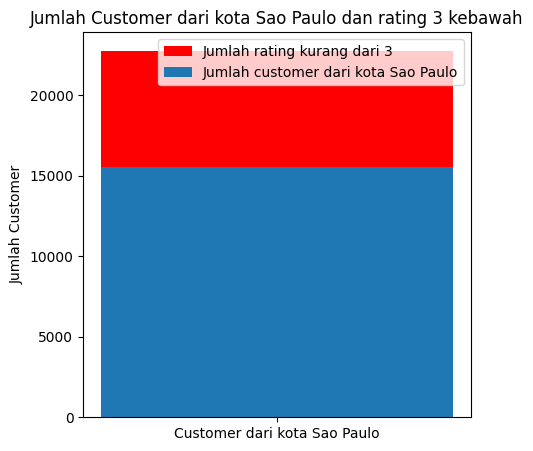

In [24]:
plt.figure(figsize = (5,5))


plt.bar(
    x_coords2,
    count_rating,
    color = "red"
)

plt.bar(
    x_coords1,
    count_saopaulo,
    tick_label= 'Customer dari kota Sao Paulo'
)

plt.legend(labels = ["Jumlah rating kurang dari 3", "Jumlah customer dari kota Sao Paulo"])

plt.ylabel('Jumlah Customer', color="black")
plt.title('Jumlah Customer dari kota Sao Paulo dan rating 3 kebawah')

plt.show()

Pertanyaan 3 - Dwi

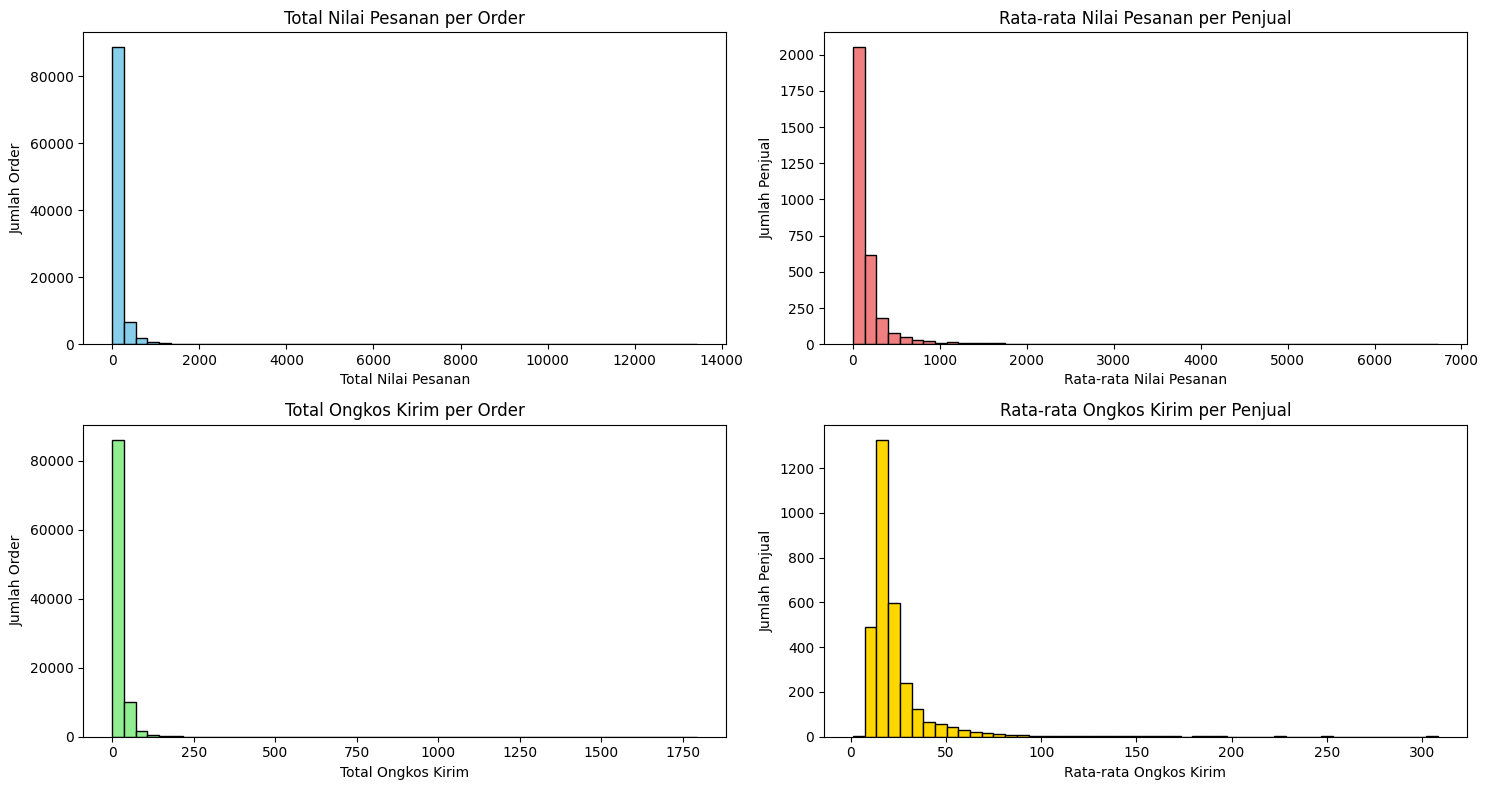

In [25]:
plt.figure(figsize=(15, 8))
plt.subplot(2, 2, 1)
total_order_value.plot(kind='hist', bins=50, color='skyblue', edgecolor='black')
plt.title('Total Nilai Pesanan per Order')
plt.xlabel('Total Nilai Pesanan')
plt.ylabel('Jumlah Order')

plt.subplot(2, 2, 2)
avg_order_value_per_seller.plot(kind='hist', bins=50, color='lightcoral', edgecolor='black')
plt.title('Rata-rata Nilai Pesanan per Penjual')
plt.xlabel('Rata-rata Nilai Pesanan')
plt.ylabel('Jumlah Penjual')

plt.subplot(2, 2, 3)
total_freight_value.plot(kind='hist', bins=50, color='lightgreen', edgecolor='black')
plt.title('Total Ongkos Kirim per Order')
plt.xlabel('Total Ongkos Kirim')
plt.ylabel('Jumlah Order')

plt.subplot(2, 2, 4)
avg_freight_value_per_seller.plot(kind='hist', bins=50, color='gold', edgecolor='black')
plt.title('Rata-rata Ongkos Kirim per Penjual')
plt.xlabel('Rata-rata Ongkos Kirim')
plt.ylabel('Jumlah Penjual')

plt.tight_layout()
plt.show()

Pertanyaan 4 - Farras 

In [26]:
customer_df.head()

# Mencari jumlah customer di barbabgai kota
customer_city = customer_df['customer_city'].value_counts()
customer_city 

# mencari 5 kota teratas dengan customer terbanyak
customer_city_head = customer_city.head(5)
pd.DataFrame(customer_city_head)

# mencari 5 kota dengan jumlah seller paling sedikit
customer_city_tail = customer_city.tail(5)
pd.DataFrame(customer_city_tail)

# Mencari jumlah seller di berbagai kota
seller_city = seller_df['seller_city'].value_counts()
seller_city

# Mencari 5 kota dengan penjual terbanyak
seller_city_head = seller_city.head(5)
pd.DataFrame(seller_city_head)

# Mencari 5 kota dengan penjual paling sedikit
seller_city_tail = seller_city.tail(5)
pd.DataFrame(seller_city_tail)

,count
seller_city,
taruma,1
s jose do rio preto,1
domingos martins,1
messias targino,1
leme,1


In [27]:
seller_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


Pertanyaan 5 - Ryan

In [28]:
#Tidak ada EDA

Pertanyaan 6 - Paska

In [29]:
plt.plot(jumlah.product_description_lenght,jumlah.product_name_lenght)
plt.show

NameError: name 'jumlah' is not defined

## Visualization & Explanatory Analysis

### Pertanyaan 1 - 10122286 - Didan Rahmana 

Explanatory Analysis:
Berdasarkan data yang telah diperoleh dan divisualisasikan dapat diketahui tingkat pembelian tahun 2018 produk dengan kategori Computer Acessories pada Customer yang berasal dari Kota Rio de Janeiro yaitu 4.0% dari Jumlah total customer Kota Rio de Janeiro yang belanja seluruh kategori yang ada

Sementara Jumlah Pelanggan dari Rio de Janeiro yang Membeli Produk kategori Computer Accessories pada Tahun 2018: 274
Banyaknya Order yang Terkirim: 296
Banyaknya Order yang Dibatalkan: 1
Banyaknya Order yang dalam proses pengiriman: 8

Hal inu bisa memberikan informasi preferensi seberapa populer sebuah kategori produk atau minat para customer di suatu lokasi tertentu.
Namun juga dapat menjadi evaluasi lebih lanjut untuk Pengambilan Keputusan Strategis faktor lain apa yang membuat proporsi penjualan rendah seperti kurang nya promosi atau diskon yang diberikan.
Jika diliat perbandingan dari order yang terkirim dan order yang dibatalkan sudah cukup baik yang bisa menjadi indikator kalau sangat minim customer yg membatalkan pesanan, sementara dapat dikatakan juga minim untuk masalah pengiriman

Kemudian dari tren pada Tahun 2018 yang cenderung menurun seiring berjalan nya waktu pada awal bulan sampai akhir bulan
dari sini kita mendapatkan informasi pada awal tahun penjualan terbilang cukup tinggi dan kemudian menurun
hal tersebut bisa dilakukan peninjauan masalah apa yang mengakibatkan penurunan tersebut mungkin perlu meninjau feedback atau ulasan dari customer,melakukan promosi ataupun mengembangkan strategi pengembangan baru untuk menaikan tingkat penjualan kategori Computer Accessories

Tergantung kepada Target Penjualan suatu kategori di lokasi tertentu apakah data tersebut dapat membantu meningkatkan jumlah customer maupun penjualan pada tahun berikutnya

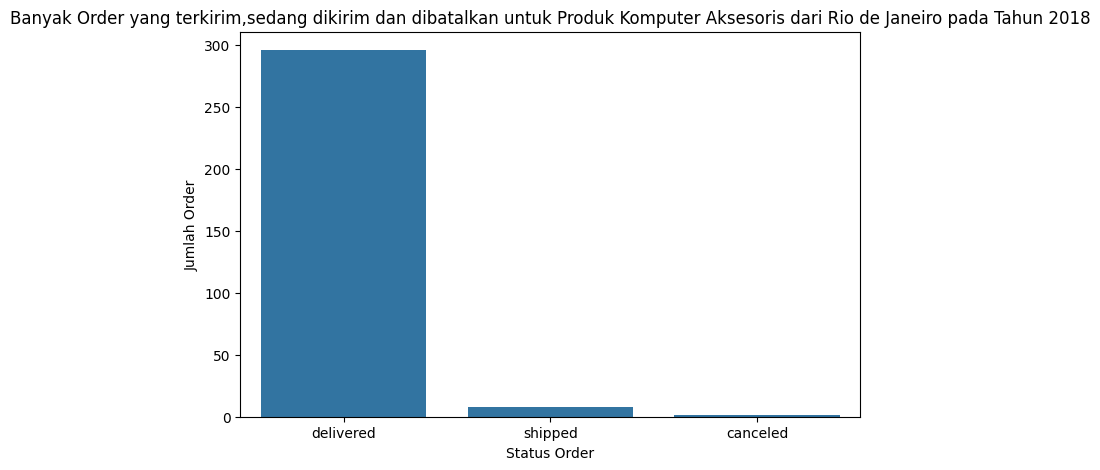

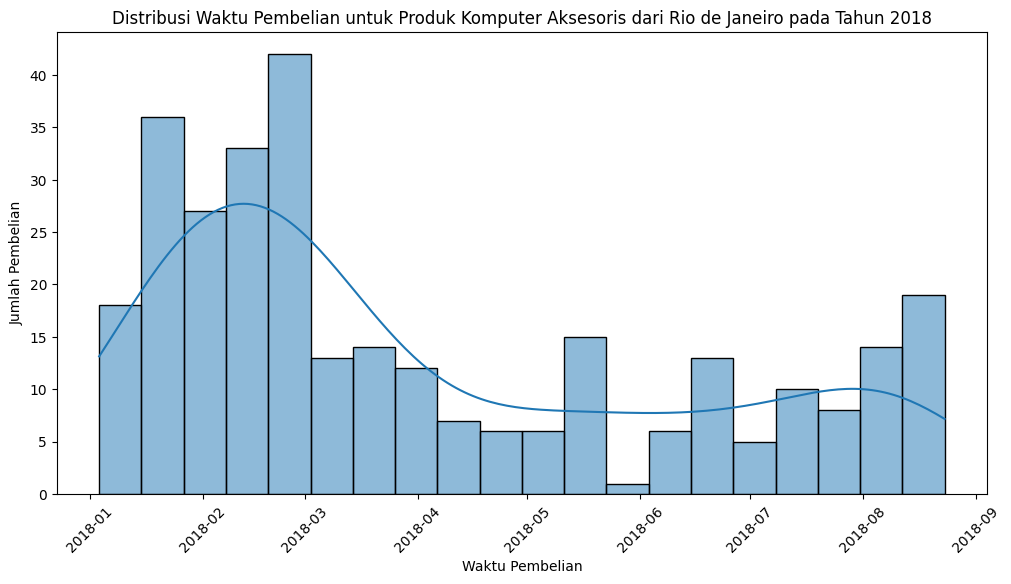

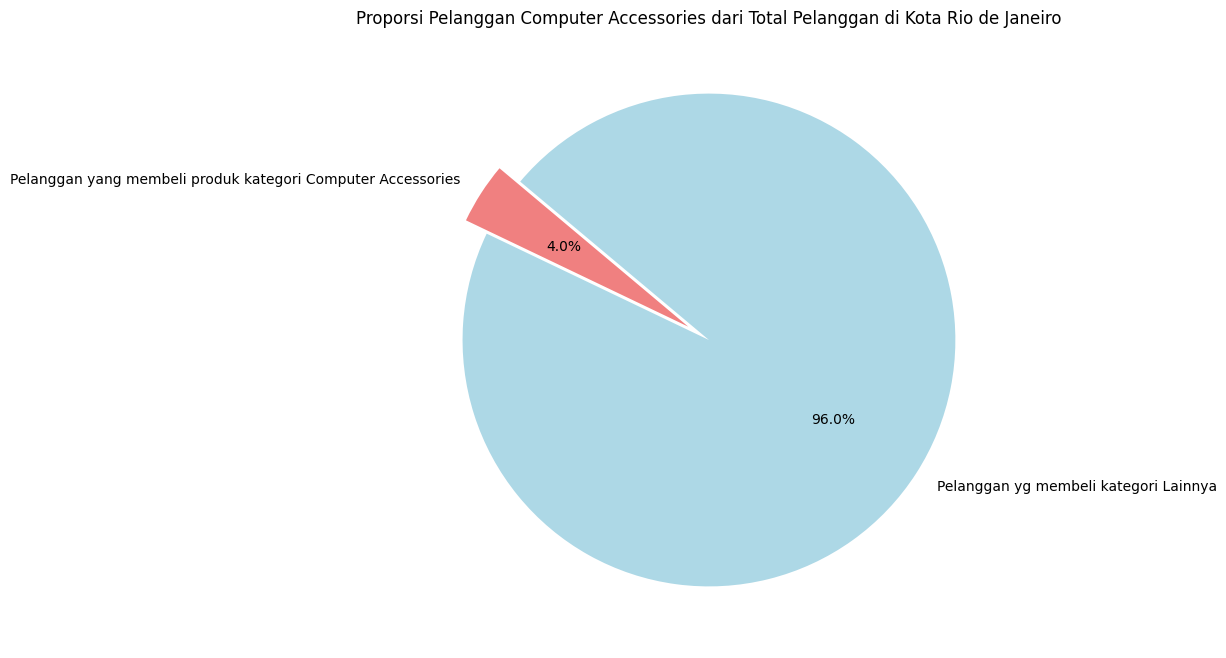

In [30]:
# Visualisasi Banyaknya Order yang delivered,shipped,cancelled
plt.figure(figsize=(8, 5))
sns.countplot(x='order_status', data=filtered_data)
plt.title('Banyak Order yang terkirim,sedang dikirim dan dibatalkan untuk Produk Komputer Aksesoris dari Rio de Janeiro pada Tahun 2018')
plt.xlabel('Status Order')
plt.ylabel('Jumlah Order')
plt.show()

# VisualisasiDistribusi Waktu Pembelian
plt.figure(figsize=(12, 6))
sns.histplot(filtered_data['order_purchase_timestamp'], bins=20, kde=True)
plt.title('Distribusi Waktu Pembelian untuk Produk Komputer Aksesoris dari Rio de Janeiro pada Tahun 2018')
plt.xlabel('Waktu Pembelian')
plt.ylabel('Jumlah Pembelian')
plt.xticks(rotation=45)
plt.show()


# Data Pie Chart
labels = ['Pelanggan yang membeli produk kategori Computer Accessories', 'Pelanggan yg membeli kategori Lainnya']
sizes = [proporsi, 100 - proporsi]  
colors = ['lightcoral', 'lightblue']
explode = (0.1, 0)  

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Proporsi Pelanggan Computer Accessories dari Total Pelanggan di Kota Rio de Janeiro')
plt.show()

### Pertanyaan 2 - 10122290 - Muhamad Haerul Anwar

Dari hasil visualisasi data tersebut, sudah di dapatkan data berupa berapa banyak jumlah costumer di kota Sao Paulo dan berapa banyak yang memberikan rating di bawah 3

### Pertanyaan 4 - 10122299 - Farras Abiyyu Dakhilullah

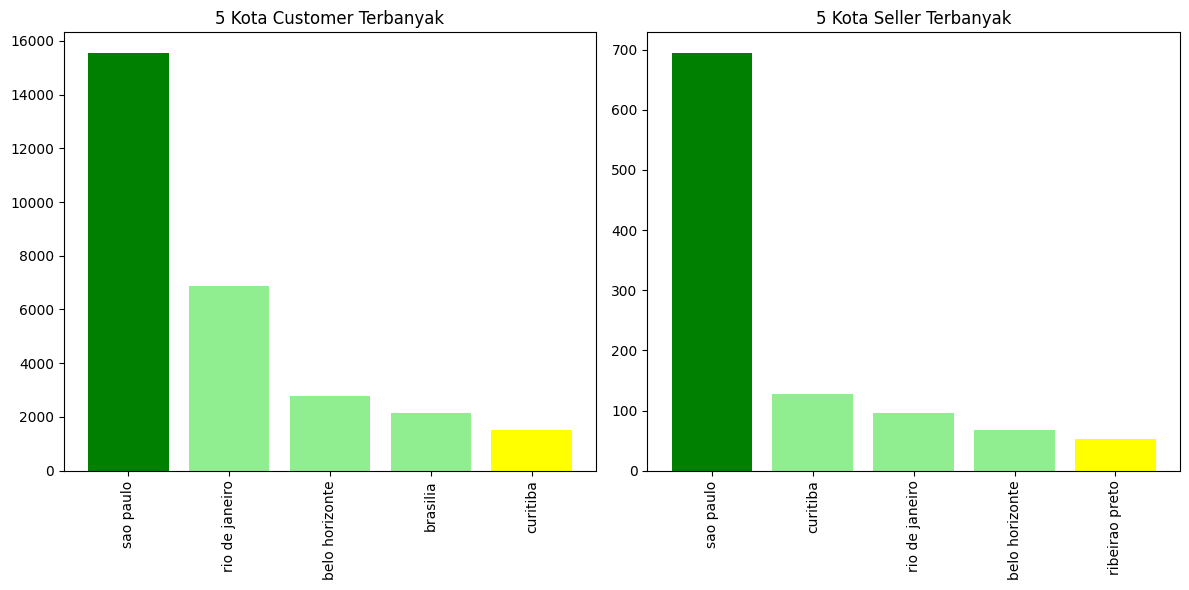

In [31]:
warna = ['green','lightgreen','lightgreen','lightgreen','yellow']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot customer
axes[0].bar(customer_city_head.index, customer_city_head.values, color = warna)
axes[0].set_xticks(customer_city_head.index)
axes[0].tick_params(axis='x', rotation=90)
axes[0].set_title('5 Kota Customer Terbanyak')



# Plot seller
axes[1].bar(seller_city_head.index, seller_city_head.values, color= warna)
axes[1].set_xticks(seller_city_head.index)
axes[1].tick_params(axis='x', rotation=90)
axes[1].set_title('5 Kota Seller Terbanyak')

    
# Menampilkan plot
plt.tight_layout()
plt.show()

## Conclusion

- Conclusion pertanyaan 1 - 10122286 - Didan Rahmana
  Berdasarkan analisis yang telah dialkukan, dapat disimpulkan bahwa meskipun terdapat penurunan dalam penjualan produk dengan kategori Computer
  Accessories pada tahun 2018 di Kota Rio de Janerio, masih ada peluang untuk meningkatkan performa dengan mengidentifikasi dan mengatasi
  faktor-faktor yang mempengaruhi penjualan. Evaluasi secara berkala dan pengembangan strategi dapat membantu mencapai pertumbuhan
  yang lebih baik di masa depan. Dengan memahami preferensi pelanggan dan dinamika pasar pada lokasi tersebut, perusahaan dapat mengarahkan upaya
  mereka untuk meningkatkan kepuasan pelanggan dan mencapai target penjualan. 

- Conclusion pertanyaan 2 - 10122290 - Muhamad Haerul Anwar
  Ada 15.540 customer dari kota Sao Paulo dan customer yang memberi rating 3 kebawah ada 22.754, maka dari itu perusahaan harus
  memperbaiki pelayanan.
  
- Conclusion pertanyaan 3 - 10122282 - Dwi Andriani Azi
  Berdasarkan analisis data pada dataset order_items_dataset.csv, terdapat potensi peningkatan atau perbaikan dalam beberapa aspek bisnis,          seperti meningkatkan penjualan melalui pelanggan yang melakukan pembelian besar, mengevaluasi strategi penawaran produk atau promosi pada         penjual dengan rata-rata nilai pesanan rendah, mengoptimalkan biaya pengiriman untuk mengurangi lonjakan atau variasi yang signifikan, serta      meninjau kembali kebijakan ongkos kirim pada penjual dengan rata-rata ongkos kirim tinggi. Peningkatan pada aspek-aspek ini dapat berkontribusi   pada peningkatan kinerja keseluruhan bisnis.
  
- Conclusion pertanyaan 4 - 10122299 - Farras Abiyyu Dakhilullah
  Bisnis di Sao Paulo dan Rio de Janeiro memiliki peluang besar karena jumlah pelanggan dan penjual terbesar. Namun, diversifikasi pasar ke Belo Horizonte dan Curitiba juga penting untuk memperluas jangkauan bisnis. Strategi harus disesuaikan berdasarkan permintaan dan pasokan di setiap kota, dengan potensi pertumbuhan di Brasilia dan Ribeirao Preto. Perbedaan geografis, budaya, dan ekonomi setempat harus dipertimbangkan dalam strategi ini. Membangun kemitraan atau kolaborasi dengan bisnis lokal di kota-kota utama dapat mengoptimalkan eksposur dan penjualan.
  
- Conclution pertanyaan 5 - 
10122479 - Ryan Akbar Ramadh
  Jadi, Kustomer yang berasal dari state Rio de Janeiro (RJ) ada sebanyak : 
|| 12.852 Customer |
-Conclusionn pertanyaan 6 - 10122480 - Paska Damarkus Sinag
  Jadi dalam produk moveis_decoracao memiliki product_name_lenght terbanyak di angka 64.0 jika dihitung dari 63.0 serta memiliki rata rata grafik   terbanyak